## Week 2 lab 1: Supervised learning basics in a polynomial fitting example
**This lab**: the aim is to practice the basic setup of supervised learning problems (i.e., the train/test/validation data splits, regularisation) by building and evaluating a polynomial fitting example (a form of regression) and to tune their hyperparameters using cross-validation. 

In [1]:
# Import necessary libraries.
import numpy as np
import matplotlib.pyplot as plt

# Set up the seed for numpy.random
np.random.seed(seed=42)

### Create dataset
Write code to sample regularly N=100 data points (x,y) from this model: y = sin(2.pi.x), where 0=<x<=1.

In [ ]:
N = 100
x =  np.linspace(0,1,N)
y =  np.sin(2 * np.pi * x)

Then, contaminate the outputs of your samples with gaussian noise (0-mean, variance=0.01) using Numpy's ```randn``` command i.e. ```numpy.random.randn(n)```. Visualise your dataset using matplotlib's ```scatter``` plot.

Finally, use __numpy__ to split data into train-validation-test sets, at porportions $p=20\%$ for testing and $0.5*(100-p)\%$ for validation and training. There're many other ways. You may also use this method to split _training_ and _testing_ dataset with __sklearn__:

```python
from sklearn.model_selection import train_test_split

data_train, data_test, labels_train, labels_test = train_test_split(x, y, test_size=0.20, random_state=42)
```

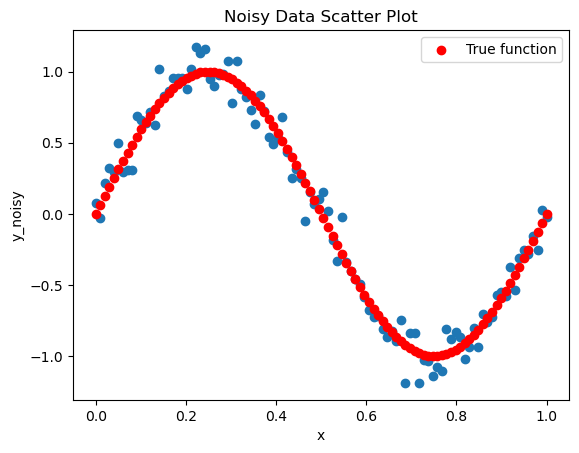

Training set size: 80
Validation set size: 10
Test set size: 10


In [15]:
# add noise to y
noise = np.random.randn(N) * np.sqrt(0.01)
y_noisy = y + noise
# visualise data using scatter plot i.e. noisy y versus x
plt.scatter(x, y_noisy)
plt.scatter(x,y, color='red', label='True function')
plt.xlabel('x')
plt.ylabel('y_noisy')
plt.title('Noisy Data Scatter Plot')
plt.legend()
plt.show()
# split data into train, test, validation portions
from sklearn.model_selection import train_test_split
x_train, x_temp, y_train, y_temp = train_test_split(x, y_noisy, test_size=0.20, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.50, random_state=42)

print(f"Training set size: {len(x_train)}")
print(f"Validation set size: {len(x_val)}")
print(f"Test set size: {len(x_test)}")

## Polynomial fitting
Use __numpy__'s ```polyfit``` command to fit polynomials of different orders ($M$ from 0 to 20) to your train data. Show the validation curves using the MSE (mean squared error) loss. Recall, the validation curves include two curves in the same figure, one showing the training loss vs. polynomial orders, and another showing the validation loss vs. polynomial orders. NB: use may find __numpy__'s ```polyval``` function useful during the performance evaluation phase.

Coefficients = [ 4.77356877e+08 -4.32432764e+09  1.68199738e+10 -3.56308311e+10
  4.08055982e+10 -1.38428099e+10 -2.73820491e+10  3.92729505e+10
 -7.69678340e+09 -3.43898439e+10  5.11596542e+10 -4.03857451e+10
  2.13192467e+10 -8.00605979e+09  2.17646930e+09 -4.26663414e+08
  5.91114438e+07 -5.57154669e+06  3.35293821e+05 -1.16087004e+04
  1.99461695e+02 -1.01510979e+00]


/var/folders/3l/gcmv93g129dfkprq8_7b9gt80000gn/T/ipykernel_24292/1055259917.py:6: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x_train, y_train, int(m))
/var/folders/3l/gcmv93g129dfkprq8_7b9gt80000gn/T/ipykernel_24292/1055259917.py:6: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x_train, y_train, int(m))
/var/folders/3l/gcmv93g129dfkprq8_7b9gt80000gn/T/ipykernel_24292/1055259917.py:6: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x_train, y_train, int(m))
/var/folders/3l/gcmv93g129dfkprq8_7b9gt80000gn/T/ipykernel_24292/1055259917.py:6: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x_train, y_train, int(m))
/var/folders/3l/gcmv93g129dfkprq8_7b9gt80000gn/T/ipykernel_24292/1055259917.py:6: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x_train, y_train, int(m))
/var/folders/3l/gcmv93g129dfkprq8_7b9gt80000gn/T/ipykernel_24292/1055259917.py:6: RankWarning: Polyfit may be poorl

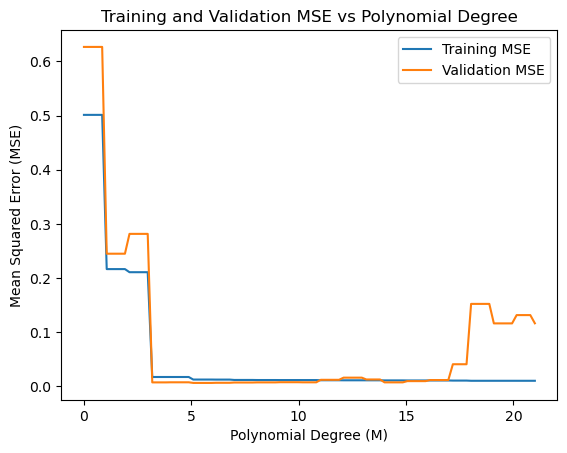

In [11]:
from sklearn.metrics import mean_squared_error
M = np.linspace(0,21,N)
train_MSE = []
val_MSE = []
for m in M:
    coeffs = np.polyfit(x_train, y_train, int(m))
    y_train_pred = np.polyval(coeffs, x_train)
    y_val_pred = np.polyval(coeffs, x_val)
    train_MSE.append(mean_squared_error(y_train, y_train_pred))
    val_MSE.append(mean_squared_error(y_val, y_val_pred))
print("Coefficients =",coeffs)

plt.plot(M, train_MSE, label='Training MSE')
plt.plot(M, val_MSE, label='Validation MSE')
plt.xlabel('Polynomial Degree (M)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training and Validation MSE vs Polynomial Degree')
plt.legend()
plt.show()

Can you see the over/underfitting cases in your validation curves?

What's the best polynomial order? Let's do the grid search to find best polynomial order (Hyperparameter).

Best polynomial order based on validation MSE: 24
Best training MSE: 0.012374218855262875
Best validation MSE: 0.006146877741434173
Test MSE with best polynomial order 24: 0.013775755504998835


/var/folders/3l/gcmv93g129dfkprq8_7b9gt80000gn/T/ipykernel_24292/348882349.py:6: RankWarning: Polyfit may be poorly conditioned
  best_coeffs = np.polyfit(x_train, y_train, int(best_order))


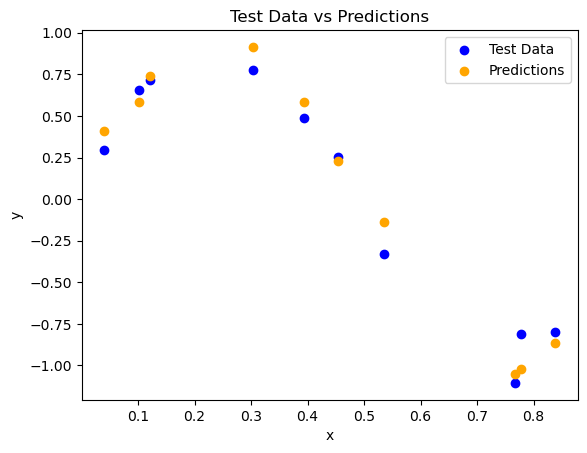

In [17]:
best_order = np.argmin(val_MSE)
print(f"Best polynomial order based on validation MSE: {best_order}")
print(f"Best training MSE: {train_MSE[best_order]}")
print(f"Best validation MSE: {val_MSE[best_order]}")

best_coeffs = np.polyfit(x_train, y_train, int(best_order))
y_test_pred = np.polyval(best_coeffs, x_test)
test_MSE = mean_squared_error(y_test, y_test_pred)
print(f"Test MSE with best polynomial order {best_order}: {test_MSE}")

plt.scatter(x_test, y_test, label='Test Data', color='blue')
plt.scatter(x_test, y_test_pred, label='Predictions', color='orange')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Test Data vs Predictions')
plt.legend()
plt.show()

## Regularisation
The custom function _mypolyfit_regularised_ is provided for this exercise. Please download the supplmentary file ```supplement_lab_w4.py```, then import the ```mypolyfit_regularised``` function i.e. 
```python
from supplement_lab_w4 import mypolyfit_regularised
```
The ```mypolyfit_regularised``` function performs polynomial fitting like numpy's ```polyfit``` but with an added $L^2$ regularisation term (read the function's help to familiarise yourself with). Now, fit a polynomial of order 50, but with 20 different regularisation hyperparameters $\lambda$ ranging logarithmically from 1e-10 to 10. You can use numpy's ```logspace``` command to create this logarithmic range. Show the corresponding validation curves using the MSE loss. 

NB: you may find the matplotlib’s ```set_xscale('log')``` a useful plotting function when data on x axis scales logarithmically.

Can you see the over/underfitting cases in your validation curves? 

What's the best regularisation hyperparameter Lambda? Let's do the grid search to find best Lambda.

## 2D grid search
Now, let's do a 2-dimensional grid search over the joint space of $\lambda$ and M to find the best pair of hyperparameters. For the grid search, range the polynomial orders M from 0 to 50, and the regularisation parameter $\lambda$ logarithmically from 1e-10 to 10. Print the values of the best hyperparameters, as well as the corresponding train, test, validation losses.